In [23]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [24]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [82]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix, f1_score,roc_auc_score, roc_curve, recall_score
from sklearn import model_selection

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

acc_log=[]

In [26]:
df=pd.read_csv("/data/predictive_maintenance_upsample.csv")
df.head()

,Unnamed: 0,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M,Failure Type,Split
0,0,295.5,305.9,1542.0,36.2,12.0,1.0,0.0,1,train
1,1,304.0,313.2,1416.0,46.0,128.0,1.0,0.0,1,train
2,2,300.5,311.8,1591.0,42.0,182.0,0.0,1.0,1,train
3,3,302.5,312.0,1487.0,46.1,175.0,0.0,1.0,1,train
4,4,298.0,308.1,1403.0,44.8,148.0,0.0,1.0,1,train


In [27]:
df['Failure Type'].value_counts()

1    9627
3    6796
0    6794
2    6792
5    6772
4    6765
Name: Failure Type, dtype: int64

In [28]:
df.drop(columns="Unnamed: 0", axis=1, inplace=True)

In [29]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M,Failure Type,Split
0,295.5,305.9,1542.0,36.2,12.0,1.0,0.0,1,train
1,304.0,313.2,1416.0,46.0,128.0,1.0,0.0,1,train
2,300.5,311.8,1591.0,42.0,182.0,0.0,1.0,1,train
3,302.5,312.0,1487.0,46.1,175.0,0.0,1.0,1,train
4,298.0,308.1,1403.0,44.8,148.0,0.0,1.0,1,train


In [40]:
df_train.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L',
       'Type_M', 'Failure Type', 'Split'],
      dtype='object')

In [36]:
df_train = df[df['Split']=="train"]
df_test = df[df['Split']=="test"]

In [37]:
df_train.shape, df_test.shape

((40546, 9), (3000, 9))

In [54]:
feature_col = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L',
       'Type_M']

target_col = "Failure Type"

In [41]:
X_train = df_train[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L',
       'Type_M']]

X_test = df_test[['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L',
       'Type_M']]

In [39]:
y_train = df_train['Failure Type']
y_test = df_test['Failure Type']

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40546, 7), (3000, 7), (40546,), (3000,))

In [50]:
ro_scaler=RobustScaler()
X_train_scaled = ro_scaler.fit_transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

In [53]:
X_train_scaled.shape

(40546, 7)

# Gaussian Naive Bayes

Training Accuracy    : 78.35 %
Model Accuracy Score : 50.17 %
F1 Score             : 36.07 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.23      0.81      0.36        32
           1       1.00      0.49      0.66      2886
           2       0.21      0.92      0.34        26
           3       0.10      0.76      0.18        33
           4       0.00      0.67      0.01         6
           5       0.03      0.35      0.06        17

    accuracy                           0.50      3000
   macro avg       0.26      0.67      0.27      3000
weighted avg       0.96      0.50      0.64      3000

--------------------------------------------------------


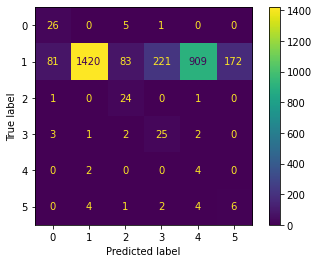

In [60]:
gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)
y_pred_gnb=gnb.predict(X_test_scaled)

gnb_train = round(gnb.score(X_train_scaled, y_train) * 100, 2)
gnb_accuracy = round(accuracy_score(y_pred_gnb, y_test) * 100, 2)
gnb_f1score = round(f1_score(y_pred_gnb, y_test, average="weighted")*100, 2)

print("Training Accuracy    :",gnb_train ,"%")
print("Model Accuracy Score :",gnb_accuracy ,"%")
print("F1 Score             :",gnb_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_gnb))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(gnb, X_test_scaled, y_test);

# Support Vector Machine

Training Accuracy    : 93.4 %
Model Accuracy Score : 70.3 %
F1 Score             : 59.95 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.30      0.94      0.46        32
           1       1.00      0.70      0.82      2886
           2       0.48      0.96      0.64        26
           3       0.45      0.91      0.61        33
           4       0.00      0.00      0.00         6
           5       0.07      0.88      0.13        17

    accuracy                           0.70      3000
   macro avg       0.38      0.73      0.44      3000
weighted avg       0.97      0.70      0.81      3000

--------------------------------------------------------


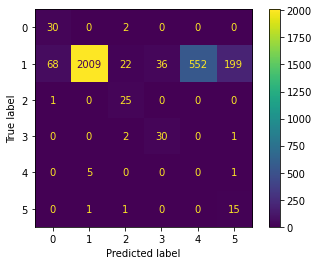

In [61]:
svc=SVC(kernel="linear")
svc.fit(X_train_scaled,y_train)
y_pred_svc=svc.predict(X_test_scaled)

svc_train = round(svc.score(X_train_scaled, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1score = round(f1_score(y_pred_svc, y_test, average="weighted")*100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("F1 Score             :",svc_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc, X_test_scaled, y_test);

Training Accuracy    : 89.54 %
Model Accuracy Score : 73.93 %
F1 Score             : 64.81 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.29      0.81      0.43        32
           1       0.99      0.74      0.85      2886
           2       0.11      0.92      0.20        26
           3       0.62      0.73      0.67        33
           4       0.00      0.00      0.00         6
           5       0.05      0.47      0.10        17

    accuracy                           0.74      3000
   macro avg       0.34      0.61      0.37      3000
weighted avg       0.97      0.74      0.83      3000

--------------------------------------------------------


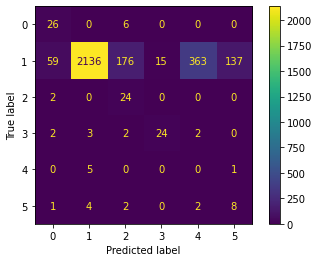

In [62]:
svc_p=SVC(kernel="poly")
svc_p.fit(X_train_scaled,y_train)
y_pred_svc_p=svc_p.predict(X_test_scaled)

svc_p_train = round(svc_p.score(X_train_scaled, y_train) * 100, 2)
svc_p_accuracy = round(accuracy_score(y_pred_svc_p, y_test) * 100, 2)
svc_p_f1score = round(f1_score(y_pred_svc_p, y_test, average="weighted")*100, 2)

print("Training Accuracy    :",svc_p_train ,"%")
print("Model Accuracy Score :",svc_p_accuracy ,"%")
print("F1 Score             :",svc_p_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc_p))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(svc_p, X_test_scaled, y_test);

# Logistics Regression

Training Accuracy    : 92.45 %
Model Accuracy Score : 67.73 %
F1 Score             : 56.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.28      0.84      0.42        32
           1       1.00      0.67      0.80      2886
           2       0.43      0.96      0.60        26
           3       0.42      0.94      0.58        33
           4       0.00      0.00      0.00         6
           5       0.06      0.94      0.12        17

    accuracy                           0.68      3000
   macro avg       0.36      0.73      0.42      3000
weighted avg       0.97      0.68      0.79      3000

--------------------------------------------------------


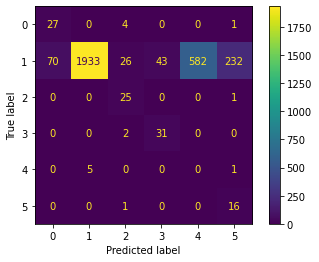

In [65]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)
y_pred_log=log_reg.predict(X_test_scaled)

log_train = round(log_reg.score(X_train_scaled, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1score = round(f1_score(y_pred_log, y_test, average="weighted")*100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("F1 Score             :",log_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_log))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(log_reg, X_test_scaled, y_test);

# Decision Tree

Training Accuracy    : 100.0 %
Model Accuracy Score : 96.37 %
F1 Score             : 95.96 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.88      0.81        32
           1       0.99      0.98      0.98      2886
           2       0.65      0.77      0.70        26
           3       0.71      0.61      0.66        33
           4       0.00      0.00      0.00         6
           5       0.11      0.18      0.13        17

    accuracy                           0.96      3000
   macro avg       0.54      0.57      0.55      3000
weighted avg       0.97      0.96      0.97      3000

--------------------------------------------------------


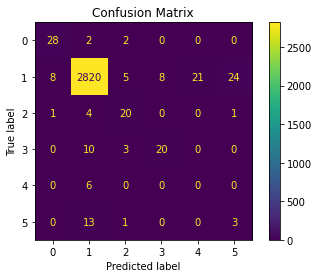

In [67]:
decision = DecisionTreeClassifier()
decision.fit(X_train_scaled, y_train)
y_pred_dec = decision.predict(X_test_scaled)

decision_train = round(decision.score(X_train_scaled, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)
decision_f1score = round(f1_score(y_pred_dec, y_test,average="weighted")*100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("F1 Score             :",decision_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test_scaled, y_test);
plt.title('Confusion Matrix');

# Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 97.07 %
F1 Score             : 97.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.99      0.98      0.99      2886
           2       0.72      0.81      0.76        26
           3       0.68      0.76      0.71        33
           4       0.00      0.00      0.00         6
           5       0.09      0.06      0.07        17

    accuracy                           0.97      3000
   macro avg       0.53      0.58      0.55      3000
weighted avg       0.97      0.97      0.97      3000

--------------------------------------------------------


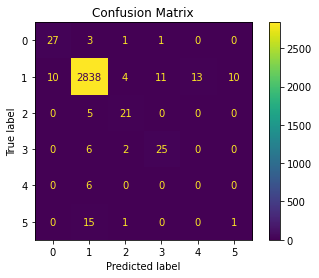

In [68]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled, y_train)
y_pred_rf = random_forest.predict(X_test_scaled)
random_forest.score(X_train_scaled, y_train)

random_forest_train = round(random_forest.score(X_train_scaled, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)
random_forest_f1score = round(f1_score(y_pred_rf, y_test,average="weighted")*100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("F1 Score             :",random_forest_f1score, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test_scaled, y_test);
plt.title('Confusion Matrix');

# Model building

In [71]:
models = pd.DataFrame({
    'Model': [
         'Logistic Regression','Linear SVM','Polynomial SVM','Decision Tree', 'Random Forest','GuassianNB'],
    
    'Training Accuracy': [log_train, svc_train,svc_p_train, decision_train, random_forest_train, gnb_train],
    
    'Model Accuracy Score': [log_accuracy, svc_accuracy,svc_p_accuracy, decision_accuracy, random_forest_accuracy, gnb_accuracy],
    
    'Model F1 Score': [log_f1score , svc_f1score, svc_p_f1score,decision_f1score, random_forest_f1score, gnb_f1score]
})

In [72]:
pd.set_option('precision',2)
models.sort_values(by='Model F1 Score', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Model Accuracy Score,Model F1 Score
Random Forest,100.00,97.07,97.00
Decision Tree,100.00,96.37,95.96
Polynomial SVM,89.54,73.93,64.81
Linear SVM,93.40,70.30,59.95
Logistic Regression,92.45,67.73,56.70
GuassianNB,78.35,50.17,36.07


In [84]:
#Model function
def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y,cols=None):

    algorithm.fit(dtrain_X,dtrain_Y)
    predictions = algorithm.predict(dtest_X)
    print (algorithm)
    
    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y, average="weighted"))
    print ("classification report :\n",classification_report(predictions,dtest_Y))
    
    fig = plt.figure(figsize=(10,8))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X)[:,1]
    #fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    #ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    #ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    #plt.legend(loc="best")
    #plt.title("ROC-CURVE & AREA UNDER CURVE")
    #ax.set_facecolor("k")
    return predictions,prediction_probabilities,algorithm

RandomForestClassifier()
Accuracy score :  0.9726666666666667
Recall score   :  0.9726666666666667
classification report :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.99      0.99      0.99      2878
           2       0.88      0.70      0.78        33
           3       0.70      0.68      0.69        34
           4       0.00      0.00      0.00        11
           5       0.12      0.18      0.14        11

    accuracy                           0.97      3000
   macro avg       0.58      0.56      0.57      3000
weighted avg       0.97      0.97      0.97      3000



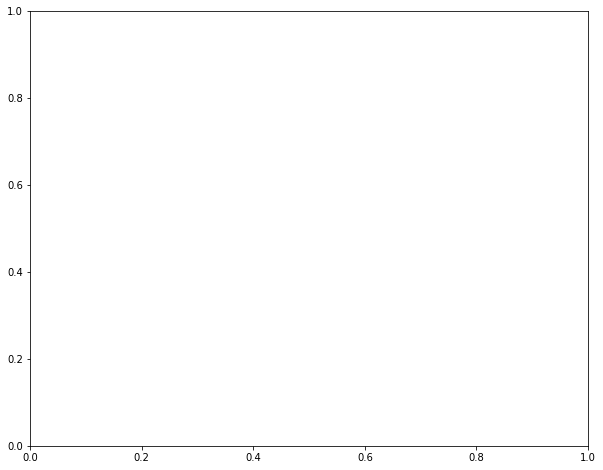

In [85]:
rfc =  RandomForestClassifier(n_estimators=100)

y_pred,y_prob,model_obj=model(rfc,X_train_scaled,y_train,X_test_scaled,y_test,feature_col)

In [93]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
y_prob

array([1.  , 1.  , 0.97, ..., 1.  , 0.99, 1.  ])

In [94]:
X_train_scaled

array([[-1.83162007, -2.77798516,  0.75994095, ..., -1.31462043,
         0.00984974,  0.        ],
       [ 1.1893074 ,  1.65586684,  0.09499262, ..., -0.31426488,
         0.00984974,  0.        ],
       [-0.05460391,  0.80553906,  1.01853197, ...,  0.15141788,
        -1.32329269,  2.25236358],
       ...,
       [-0.95921981, -0.83506461,  2.4180644 , ...,  0.3304651 ,
         0.00984974,  0.        ],
       [-0.42572876,  0.02350459,  2.02208633, ...,  0.48988986,
        -0.21746347,  0.384049  ],
       [ 0.47542623,  0.33287721,  0.83241855, ...,  0.40899677,
         0.00984974,  0.        ]])

In [95]:
X_train.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,295.5,305.9,1542.0,36.2,12.0,1.0,0.0
1,304.0,313.2,1416.0,46.0,128.0,1.0,0.0
2,300.5,311.8,1591.0,42.0,182.0,0.0,1.0
3,302.5,312.0,1487.0,46.1,175.0,0.0,1.0
4,298.0,308.1,1403.0,44.8,148.0,0.0,1.0


In [97]:
from mosaicml import *
from mosaicml.constants import MLModelFlavours

In [112]:
@scoring_func
def score(model, request):
    payload = request.json["payload"]
    print(payload)
    data = pd.DataFrame(eval(payload))
    data = ro_scaler.transform(data)
    print(data)
    prediction = model.predict(data)[0]
    print(prediction)
    if prediction == 0:
        message = "Heat Dissipation Failure"
    elif prediction == 1:
        message = "No Failure"
    elif prediction == 2:
        message = "Overstrain Failure"
    elif prediction == 3:
        message = "Power Failure"
    elif prediction == 4:
        message = "Random Failure"
    else:
        message = "Tool wear Failure"
    return message

In [99]:
import requests
req = requests.Request()
#req.json = {"payload":train_X.head(1).to_numpy()}
req.json = {"payload":X_train.head(1).to_json()}

In [100]:
req.json

{'payload': '{"Air temperature [K]":{"0":295.5},"Process temperature [K]":{"0":305.9},"Rotational speed [rpm]":{"0":1542.0},"Torque [Nm]":{"0":36.2},"Tool wear [min]":{"0":12.0},"Type_L":{"0":1.0},"Type_M":{"0":0.0}}'}

## Payload

{'payload': '{"Air temperature [\\u00b0C]":{"5504":30.65},
 "Process temperature [\\u00b0C]":{"5504":40.05},
 "Rotational speed [rpm]":{"5504":1458},
 "Torque [Nm]":{"5504":51.0},
 "Tool wear [min]":{"5504":42},
 "Temperature difference [\\u00b0C]":{"5504":9.4}}'}

In [101]:
sch = generate_schema(score,(model_obj, req),X_train)
print(sch)

{'input': {'type': 'pd.core.frame.DataFrame', 'items': {'type': 'object', 'properties': {'Air temperature [K]': {'type': 'number', 'format': 'double'}, 'Process temperature [K]': {'type': 'number', 'format': 'double'}, 'Rotational speed [rpm]': {'type': 'number', 'format': 'double'}, 'Torque [Nm]': {'type': 'number', 'format': 'double'}, 'Tool wear [min]': {'type': 'number', 'format': 'double'}, 'Type_L': {'type': 'number', 'format': 'double'}, 'Type_M': {'type': 'number', 'format': 'double'}}}, 'example': [{'Air temperature [K]': 295.5, 'Process temperature [K]': 305.9, 'Rotational speed [rpm]': 1542.0, 'Torque [Nm]': 36.2, 'Tool wear [min]': 12.0, 'Type_L': 1.0, 'Type_M': 0.0}, {'Air temperature [K]': 304.0, 'Process temperature [K]': 313.2, 'Rotational speed [rpm]': 1416.0, 'Torque [Nm]': 46.0, 'Tool wear [min]': 128.0, 'Type_L': 1.0, 'Type_M': 0.0}]}, 'output': {'type': 'array', 'items': {'type': 'object'}, 'example': [1]}}


In [113]:
score(rfc,req)

{"Air temperature [K]":{"0":295.5},"Process temperature [K]":{"0":305.9},"Rotational speed [rpm]":{"0":1542.0},"Torque [Nm]":{"0":36.2},"Tool wear [min]":{"0":12.0},"Type_L":{"0":1.0},"Type_M":{"0":0.0}}
[[-1.83162007 -2.77798516  0.75994095 -0.65782832 -1.31462043  0.00984974
   0.        ]]
1


'No Failure'

In [115]:
tmp = register_model(model_obj, 
               score, 
               name="Predictive_Maintenance_Multi_Classification", 
               description="Predictive Maintenance Multi Classification",
               flavour=MLModelFlavours.sklearn,
               model_type="classification",
               schema=sch,
               y_true=y_test,
               y_pred=y_pred, 
               prob=y_prob, 
               features=X_train.columns,
               labels=[0,1], 
               init_script="" ,
               input_type="json", 
               explain_ai=True, 
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train.tolist(),
               y_test=y_test.tolist(),
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               target_names=['No Failure','Failure'],
               kyd=True, kyd_score = True)
#print("Registering model")

Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


# Sample Payloads

### No Failure
{"payload":"{'Air temperature [K]':{'0':295.5}, 'Process temperature [K]':{'0':305.9}, 'Rotational speed [rpm]':{'0':1542}, 'Torque [Nm]':{'0':36.2}, 'Tool wear [min]':{'0':12.0} , 'Type_L':{'0':1.0} ,'Type_M':{'0':0.0}}"}

### Heat Dissipation Failure
{"payload":"{'Air temperature [K]':{'0':303.0}, 'Process temperature [K]':{'0':311.3}, 'Rotational speed [rpm]':{'0':1365}, 'Torque [Nm]':{'0':56.2}, 'Tool wear [min]':{'0':146.0} , 'Type_L':{'0':1.0} ,'Type_M':{'0':0.0}}"}

### Overstrain Failure
{"payload":"{'Air temperature [K]':{'0':299.2}, 'Process temperature [K]':{'0':309.1}, 'Rotational speed [rpm]':{'0':1345}, 'Torque [Nm]':{'0':60.7}, 'Tool wear [min]':{'0':191.0} , 'Type_L':{'0':1.0} ,'Type_M':{'0':0.0}}"}

### Power Failure
{"payload":"{'Air temperature [K]':{'0':301.5}, 'Process temperature [K]':{'0':310.7}, 'Rotational speed [rpm]':{'0':1336}, 'Torque [Nm]':{'0':65.6}, 'Tool wear [min]':{'0':0} , 'Type_L':{'0':0.0} ,'Type_M':{'0':1.0}}"}

### Random Failure
{"payload":"{'Air temperature [K]':{'0':298.6}, 'Process temperature [K]':{'0':309.8}, 'Rotational speed [rpm]':{'0':1505}, 'Torque [Nm]':{'0':45.7}, 'Tool wear [min]':{'0':144} , 'Type_L':{'0':1.0} ,'Type_M':{'0':0.0}}"}

### Tool wear Failure
{"payload":"{'Air temperature [K]':{'0':302.6}, 'Process temperature [K]':{'0':311.5}, 'Rotational speed [rpm]':{'0':1629}, 'Torque [Nm]':{'0':34.4}, 'Tool wear [min]':{'0':228} , 'Type_L':{'0':0.0} ,'Type_M':{'0':0.0}}"}